## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# Doğrusal Regresyon (Linear Regression)

🎯 Bu egzersizde, bir NBA oyuncusunun win rating (`win_rating`) performansını, oynadığı dakika (`mp`) gibi maç istatistiklerine göre modelleyeceksiniz.


👉 [NBA.csv](https://d32aokrjazspmn.cloudfront.net/materials/NBA.csv) dataset’ini bu notebook’a bir pandas dataframe olarak yükleyin ve ilk 5 satırını görüntüleyin.

In [7]:
url="https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv"
df=pd.read_csv(url)
df.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ Dataset’in detaylı açıklamasını challenge README dosyasında bulabilirsiniz. Challenge boyunca buna mutlaka referans verin.


## 1. Özellik Setini ve Hedefi Tanımlayın (Define Feature Set and Target)

🎯 İlk hedef, oyuncuların akranlarına kıyasla genel performans puanı olan *Wins Above Replacement* (`win_rating`) değerini, oynadıkları dakika sayısına (`mp`) göre modellemektir.

👉 Bu iki değişkeni `X` ve `y` olarak atayın. `X`’in feature(lar), `y`’nin ise target olduğunu unutmayın.

In [8]:
X=df[['mp']]
Y=df['win_rating']

👉 Bir [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) kullanarak rating ile oynanan dakika sayısı arasındaki ilişkiyi görselleştirin.

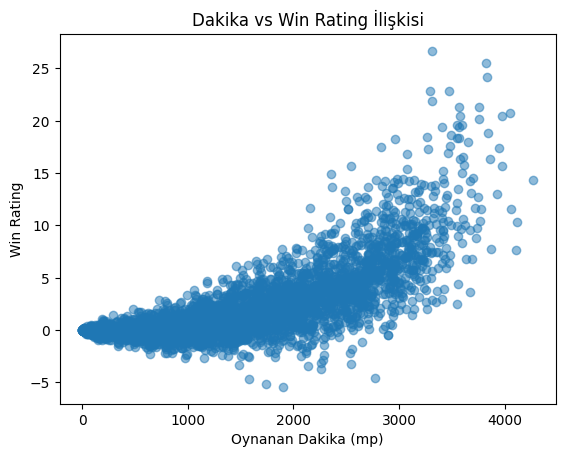

In [9]:
plt.scatter(df['mp'],df['win_rating'],alpha=0.5)
plt.title("Dakika vs Win Rating İlişkisi")
plt.xlabel("Oynanan Dakika (mp)")
plt.ylabel("Win Rating")
plt.show()

ℹ️ Scatter plot, aralarında bir ilişki olduğunu düşündürmeli. Ancak bu ilişki tamamen doğrusal mı? 🤔 Göreceğiz!

## 2. Çapraz Doğrulama (Cross-Validation)

👉 Sklearn’in [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) fonksiyonunu kullanarak, oyuncu performans rating’ini oynanan dakika sayısına göre tahmin eden bir [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) modeli üzerinde 5-fold cross-validation çalıştırın. Cross-validation’ın ham çıktısını `cv_results` adlı yeni bir değişkende saklayın.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

model = LinearRegression() 
cv_results=cross_validate(model,X,Y,cv=5)
print(cv_result)

{'fit_time': array([0.0045619 , 0.00260949, 0.00202608, 0.00215793, 0.00217342]), 'score_time': array([0.00271583, 0.00165677, 0.0015285 , 0.00147343, 0.00226879]), 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762])}


❓ Cross-validation sonuçları içindeki en düşük skor nedir?  
Cevabınızı hesaplayın ve değeri `min_score` adlı yeni bir değişkende saklayın.

In [21]:
min_score=cv_results['test_score'].min()
print(min_score)

0.5344790822272503


❓ Cross-validation sonuçları içindeki en yüksek skor nedir?  
Cevabınızı hesaplayın ve değeri `max_score` adlı yeni bir değişkende saklayın.

In [22]:
max_score=cv_results['test_score'].max()
print(max_score)

0.5791776193355004


❓ Cross-validation sonuçlarının ortalama skoru nedir?  
Cevabınızı hesaplayın ve değeri `mean_score` adlı yeni bir değişkende saklayın.

In [23]:
mean_score=cv_results['test_score'].mean()
print(mean_score)

0.556730180006891


ℹ️ Cross-validation çalıştırırken, model performansının en sağlam ve en temsil edici değerlendirmesi olarak her zaman ortalama skora bakarız.

### ☑️ Kodunu Test Et

In [24]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/funny/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/funny/S16D1-S-data-linear-regression/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



🤔 **Şimdi K-fold sayısının `K` (yani `cross_validate()` içindeki `cv` parametresi) etkisini inceleyelim**

👉 `K` değeri 2’den 20’ye çıkarken **<u>toplam</u> hesaplama süresinin (fit + score)** ve **<u>ortalama</u> skorun** nasıl değiştiğini plot edin.

<details>
  <summary markdown='span'><strong>İpucu</strong></summary>

  1. `K` değerlerini, hesaplama sürelerini ve cv ortalama skorlarını saklamak için 3 liste oluşturun.
  1. 2’den 20’ye kadar `K` değerleri üzerinde döngü kurun ve her seferinde:
     1. Cross-validation çalıştırın.
     1. `fit_time` ve `score_time` toplamını, toplam süreler listenize ekleyin.
     1. Ortalama `test_score` değerini, cv ortalama skorları listenize ekleyin.
  1. İki adet plot oluşturun:
     1. `K`’ye karşı toplam süre.
     1. `K`’ye karşı ortalama skor.
</details>


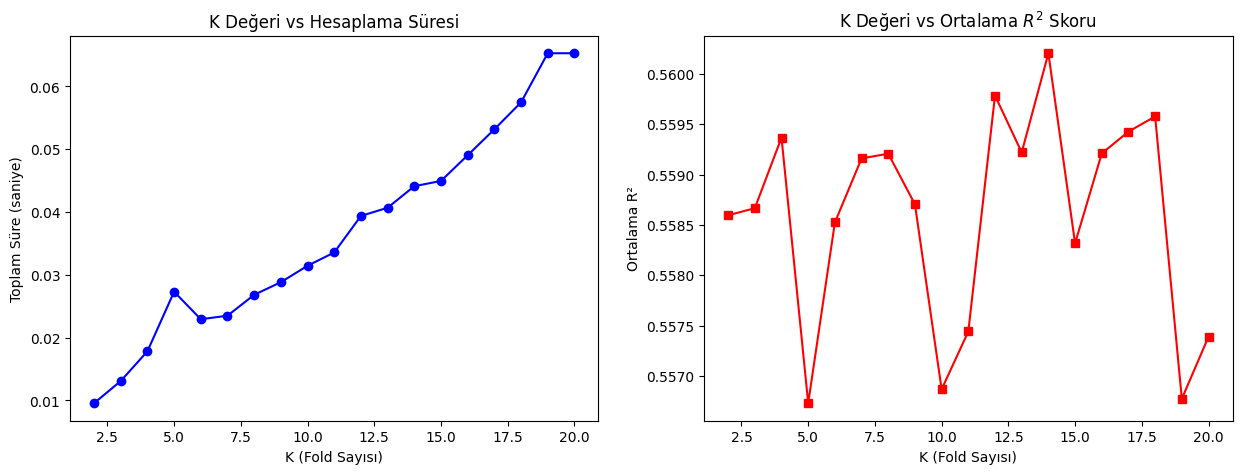

In [27]:
import time

# 1. Sonuçları biriktirmek için boş listeler oluşturalım
k_values = []
total_times = []
mean_scores = []

# 2. 2'den 20'ye kadar bir döngü kuralım
for k in range(2, 21):
    # Her döngüde cross_validation çalıştırıyoruz
    cross_val_results = cross_validate(LinearRegression(), X, Y, cv=k)
    
    # K değerini kaydedelim
    k_values.append(k)
    
    # Toplam süreyi hesaplayalım (Eğitim + Skorlama süresi)
    total_time = cross_val_results['fit_time'].sum() + cross_val_results['score_time'].sum()
    total_times.append(total_time)
    
    # Ortalama R² skorunu kaydedelim
    mean_scores.append(cross_val_results['test_score'].mean())

# 3. Sonuçları görselleştirelim
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: K vs Toplam Süre
ax1.plot(k_values, total_times, color='blue', marker='o')
ax1.set_title('K Değeri vs Hesaplama Süresi')
ax1.set_xlabel('K (Fold Sayısı)')
ax1.set_ylabel('Toplam Süre (saniye)')

# Plot 2: K vs Ortalama Skor
ax2.plot(k_values, mean_scores, color='red', marker='s')
ax2.set_title('K Değeri vs Ortalama $R^2$ Skoru')
ax2.set_xlabel('K (Fold Sayısı)')
ax2.set_ylabel('Ortalama R²')

plt.show()

In [37]:
k_ = []
total_time = []
score = []

for k in range(2,21):
    cross_val_results = cross_validate(model, X, Y, cv=k)

    total_time.append(sum(cross_val_results['fit_time'])+sum(cross_val_results['score_time']))
    k_.append(k)
    score.append(cross_val_results['test_score'].mean())


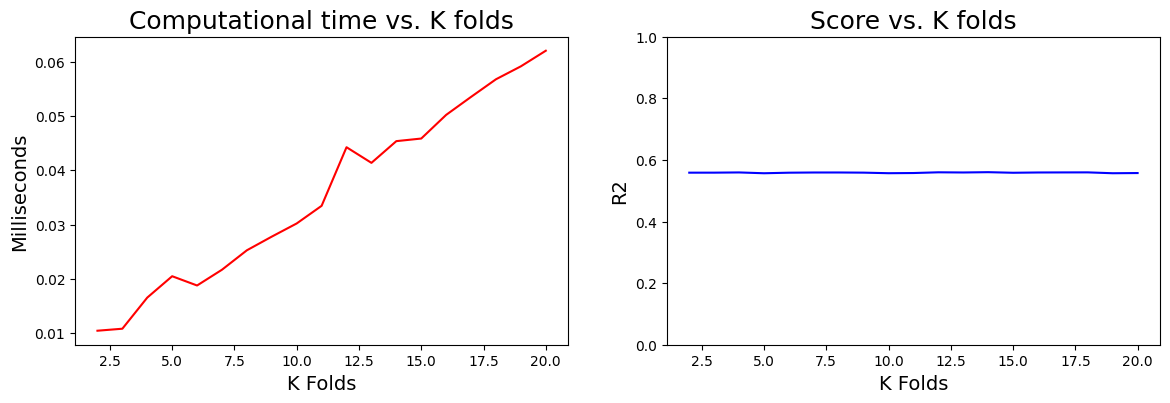

In [39]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(k_, total_time, color = "red")
plt.xlabel("K Folds", fontsize = 14)
plt.ylabel("Milliseconds", fontsize = 14)
plt.title("Computational time vs. K folds", fontsize = 18)

plt.subplot(1,2,2)
plt.plot(K, score, color = "blue")
plt.xlabel("K Folds", fontsize = 14)
plt.ylabel("R2", fontsize = 14)
plt.ylim(0,1)
plt.title("Score vs. K folds", fontsize = 18);


ℹ️ $R^2$ skorunun sabit kaldığını görmelisiniz; bu, modelin hem daha küçük hem de daha büyük test setlerinde benzer performans gösterdiğinin iyi bir işaretidir. Buna karşılık, hesaplama süresi artmaya devam eder. Bu nedenle, pratik bir kural olarak genellikle K = 10’un üzerine çıkmayız.

## 3. Modeli eğit (Train the Model)

Cross-validation, veri seti üzerinde varsayımsal bir modeli değerlendirmek için kullanılır. Seçtiğiniz fold sayısı kadar modeli birden fazla kez eğitir; her seferinde verinin farklı bir alt kümesi üzerinde eğitilir ve kalan veriyle skor hesaplanır. Bu süreç bize, modelin ne kadar iyi performans gösterebileceğini gösteren cross-validated bir skor verir.

Ancak modeli gerçek anlamda tahmin yapmak için kullanmak istediğinizde, mümkün olduğunca fazla veriyle eğitmeyi tercih edersiniz. Yani verinin bir kısmını ayırmadan.

👉 Modeli, tam `X` ve `y` üzerinde eğitin (model skorunu zaten doğruladık, şimdi tahmin için kullanacağız). Eğitilmiş modeli `model` adlı değişkende saklayın.

In [40]:
model.fit(X,Y)

LinearRegression()

❓ Eğitilmiş modelinizin eğimi (slope) ya da katsayısı (coefficient) nedir?  
Bu değere modelin attribute’ları üzerinden erişebilirsiniz. Eğimi `slope` adlı bir değişkende saklayın.

In [41]:
slope= model.coef_[0]
slope

0.002602579938640193

❓ Eğitilmiş modelinizin intercept (sabit terim) değeri nedir?  
Bu değere modelin attribute’ları üzerinden erişebilirsiniz. Intercept değerini `intercept` adlı bir değişkende saklayın.

In [43]:
intercept= model.intercept_
intercept


-1.5463749371639444

🤔 Devam etmeden önce bu katsayıları nasıl yorumlayacağınızı anladığınızdan emin olun.

### ☑️ Kodunu Test Et

In [44]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/funny/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/funny/S16D1-S-data-linear-regression/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Tahmin (Predict)

👉 Eğitilmiş modelinizi kullanarak toplamda 1000 dakika oynamış bir oyuncunun performans rating’ini tahmin edin.  
Tahmin edilen değeri `prediction` adlı bir değişkende saklayın.

In [45]:
new_datapoint = pd.DataFrame.from_dict(
    {"mp": [1000]}
)

# Model ile tahmin yapın
prediction = model.predict(new_datapoint)[0]
prediction

1.0562050014762487

### ☑️ Kodunu Test Et

In [46]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/funny/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/funny/S16D1-S-data-linear-regression/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5.  Daha Fazla Özellik ile Modeli İyileştirme (Improving the Model with More Features)

NBA fantasy league’i seven bir arkadaşınız size bazı içgörülerle geliyor 🏀

Bir oyuncunun *Wins Above Replacement* rating’ini değerlendirirken, genellikle topa sahip olma sayısına (`poss`), savunma/hücum oranına (`do_ratio`) ve `pacing` değerine de baktıklarını söylüyor.

❓ Aşağıdaki hücreyi çalıştırarak bu yeni feature’lar ile `win_rating` arasındaki korelasyonu görselleştirin.  
Yukarıdaki feature’lardan **hangisini** modelinize eklemeyi düşünürdünüz?

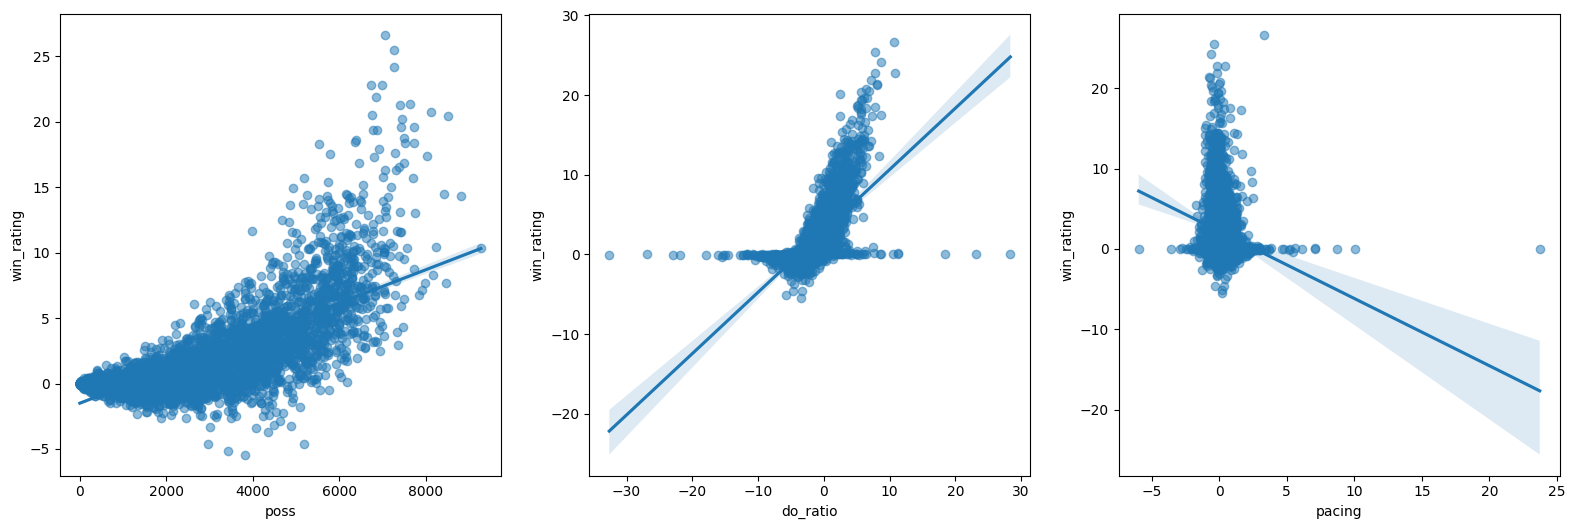

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

plt.subplots_adjust(left=0.5, right=2)

sns.regplot(data=df, y='win_rating', x='poss', ax=axes[0], scatter_kws={'alpha':0.5})
sns.regplot(data=df, y='win_rating', x='do_ratio', ax=axes[1], scatter_kws={'alpha':0.5})
sns.regplot(data=df, y='win_rating', x='pacing', ax=axes[2], scatter_kws={'alpha':0.5})

plt.show()

<details>
  <summary markdown='span'><strong>Cevap</strong></summary>

  Feature’ları manuel olarak seçecek olsaydınız, hedef değişken olan `win_rating` ile en yüksek korelasyona sahip olanlarla başlardınız.

  Regresyon plot’larına baktığımızda, geriye `poss` ve `do_ratio` kalıyor. Sayısal değerleri görmek isterseniz `df.corr()[['win_rating']]` çıktısına bakabilirsiniz.

  Peki neden `poss` değil? Sonuçta `win_rating` ile olan korelasyonu `do_ratio`’dan daha yüksek.

  Bir de şuna bakın: `sns.scatterplot(data=df, x='mp', y='poss');`. Nedenini görebiliyor musunuz?

  <details>
  <summary><strong>Cevap</strong></summary>

  Görünen o ki, ilk feature’ımız olan `mp` ile `poss` neredeyse mükemmele yakın şekilde korelasyonlu. Bu yüzden `poss`, modele çok az ek değer katacaktır.

  </details>

</details>

Şimdi, iki feature kullanan modelin (seçtiğiniz yeni feature ve `mp`) bir oyuncunun rating’ini tahmin etmede ilk modelimizden daha iyi olup olmadığına bakalım.

👉 İki sütunlu bir DataFrame olacak şekilde yeni bir feature set’i oluşturun.

In [48]:
df.corr()[['win_rating']]

,win_rating
season,-0.042861
poss,0.742017
mp,0.748268
do_ratio,0.666120
pacing,-0.202611
win_rating,1.000000


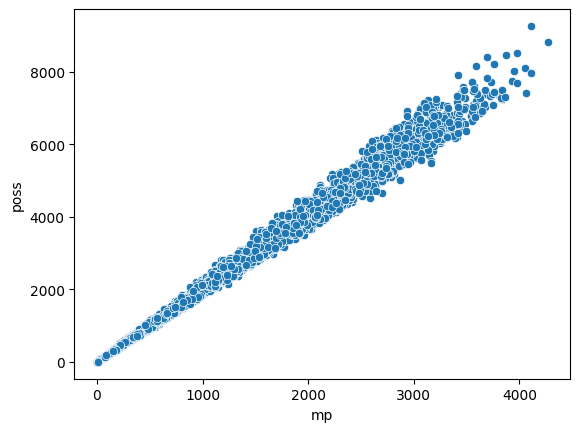

In [49]:
sns.scatterplot(data=df, x='mp', y='poss');

👉 Şimdi yeni bir linear regression modeli için cross-validation çalıştırın ve **ortalama** skoru `mean_2_feat_score` değişkenine kaydedin.

> Not: Eğer sadece cross-validation skoruyla ilgileniyorsanız (hesaplama süreleriyle değil), sklearn’in [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) fonksiyonunu kullanabilirsiniz.

In [54]:
X_2_feat = df[['mp', 'do_ratio']]
X_2_feat.head()

,mp,do_ratio
0,2409,-1.546275
1,2708,0.996587
2,2407,0.242598
3,585,-1.343806
4,2056,-1.813990


In [55]:
model = LinearRegression()

mean_2_feat_score = cross_val_score(model, X_2_feat, Y, cv=5).mean()
mean_2_feat_score

0.6317728310765246

### ☑️ Kodunu Test Et

In [56]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/funny/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/funny/S16D1-S-data-linear-regression/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



$R^2$ değerinizde **yaklaşık %8’lik bir artış** görmelisiniz 👏

Tebrikler, ilk manuel *feature selection* işleminizi gerçekleştirdiniz — bu hafta bunun daha birçok yolunu göreceğiz!

🤔 Peki Linear Regression ile yapabileceğimiz en iyi şey bu mu? Bir sonraki challenge’da bunu daha derinlemesine keşfedelim!

# 🏁